In [99]:
import pandas as pd
import numpy as np

price: price in US dollars (\$326--\$18,823)

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

In [100]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\diamonds.csv")
pd.set_option('display.max_columns',None)
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Data Preprocessing and Visualization

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


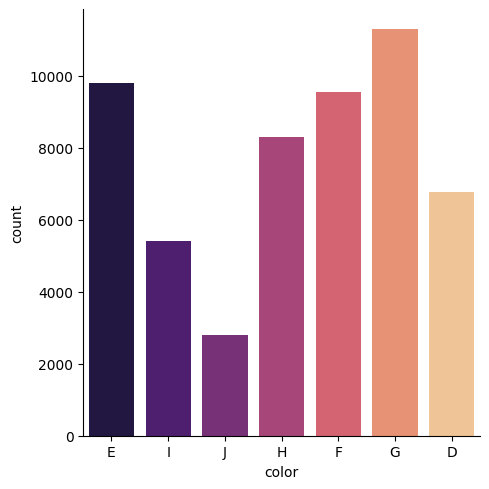

In [102]:
sns.catplot(data=df, x='color', hue='color', kind='count',palette='magma')

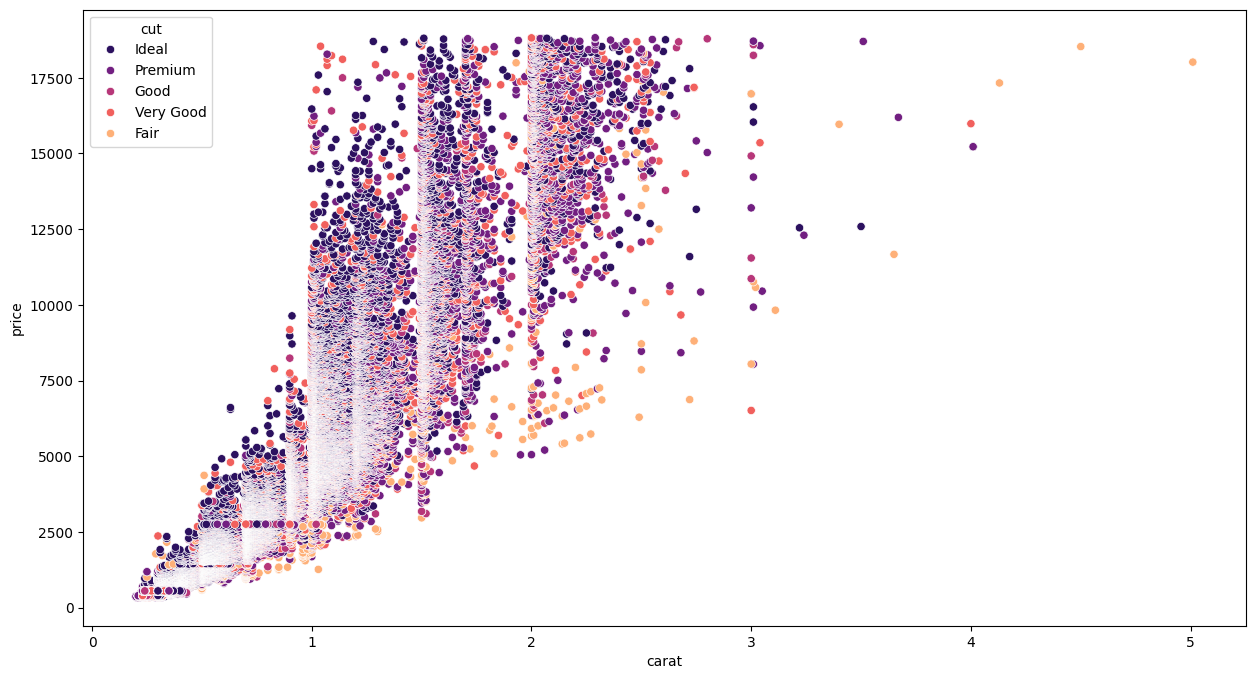

In [103]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='carat',y='price',hue='cut',palette='magma')
plt.show()

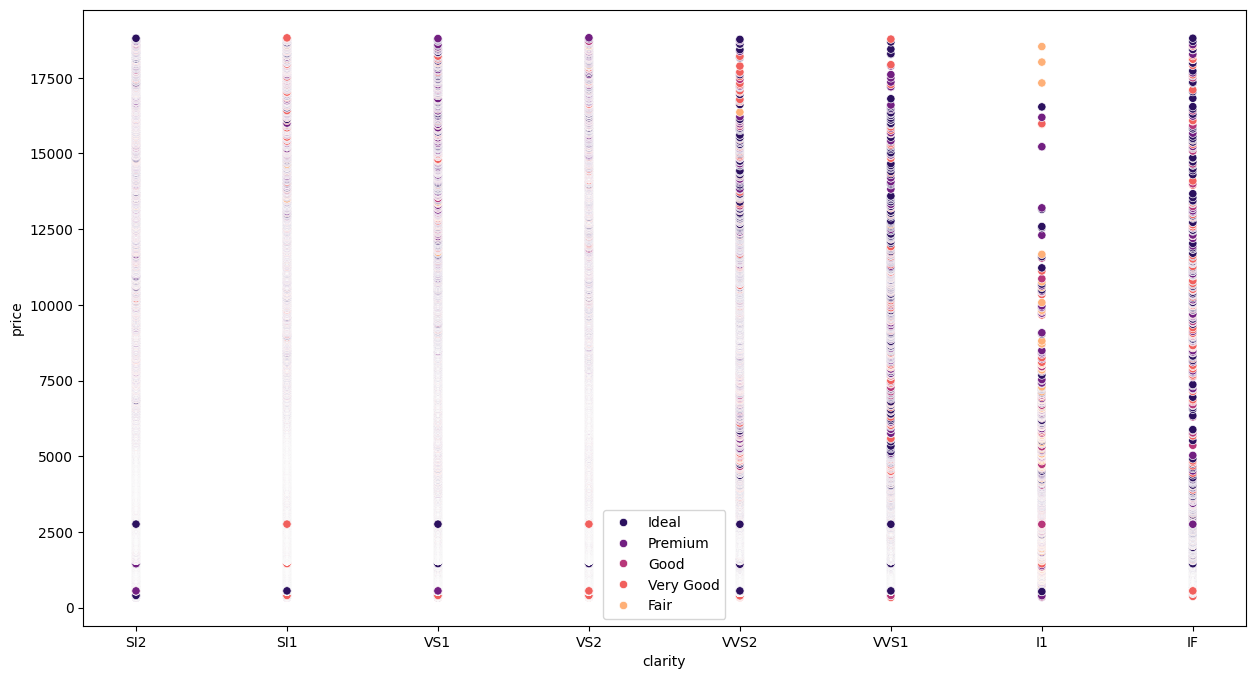

In [104]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='clarity',y='price',hue='cut',palette='magma')
plt.legend()
plt.show()

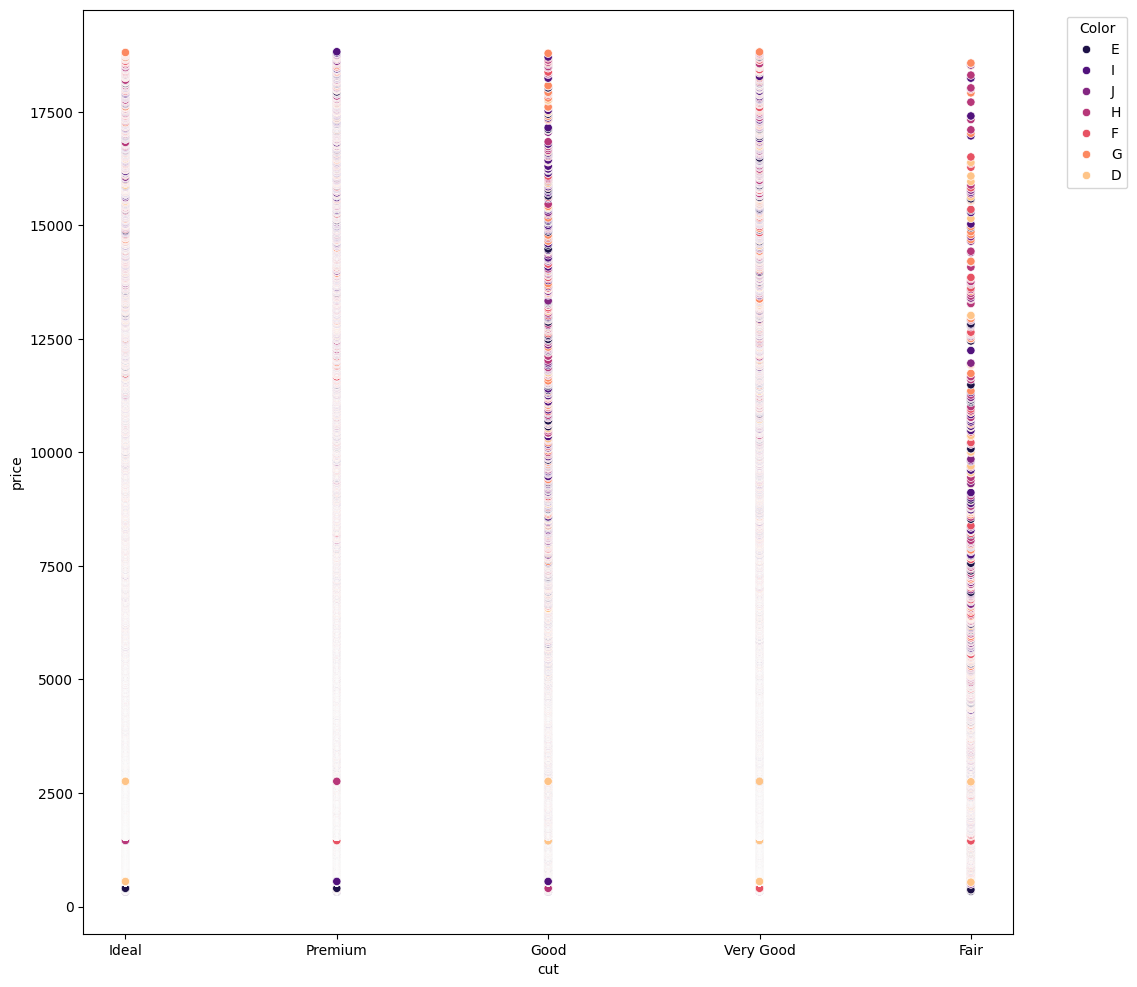

In [105]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df,x='cut',y='price',hue='color',palette='magma')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Color')
plt.show()

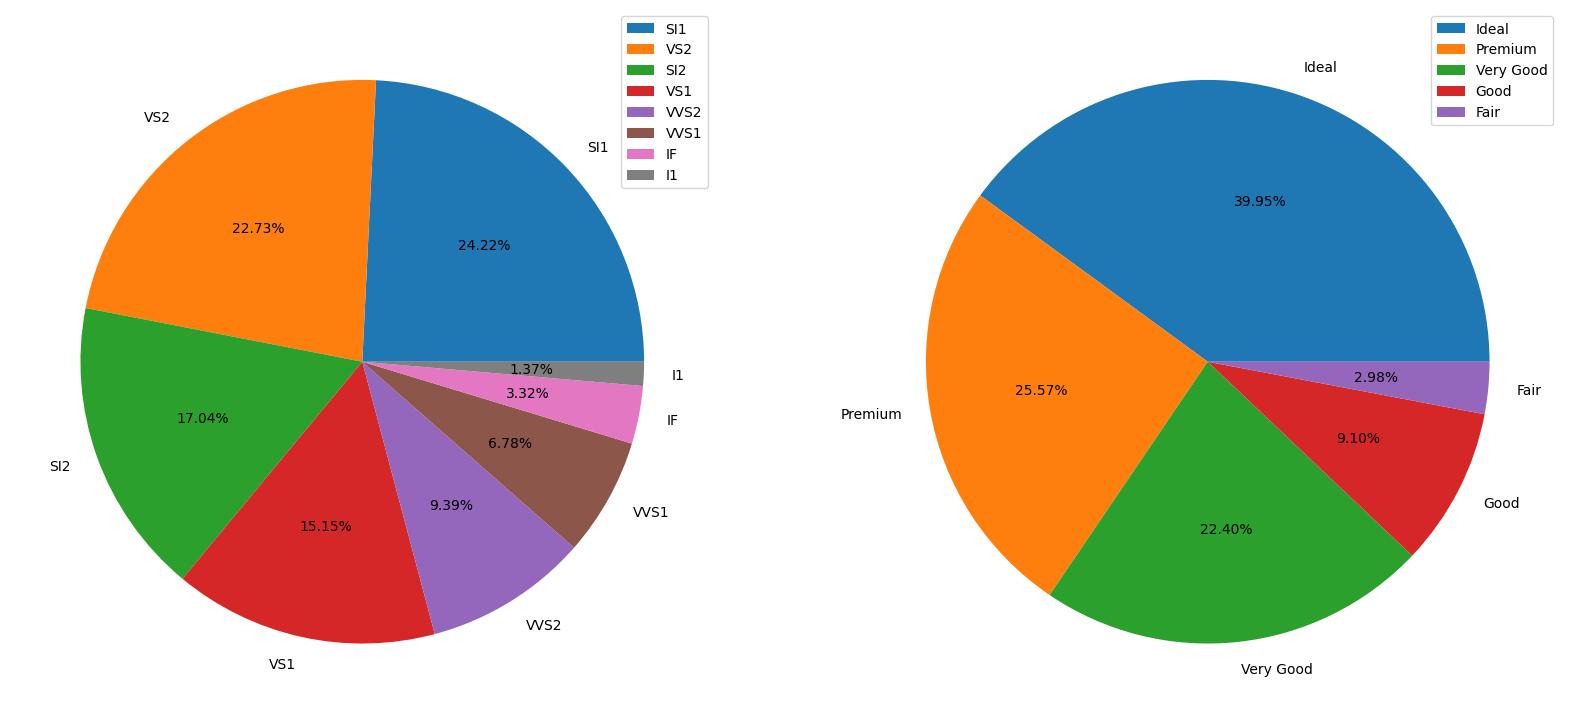

In [106]:
k=df['clarity'].value_counts().reset_index()
k.columns=(['clarity','count'])
k1=df['cut'].value_counts().reset_index()
k1.columns=(['cut','count'])

ax,fig=plt.subplots(1,2,figsize=(20,20))
fig[0].pie(x=k['count'],labels=k['clarity'],autopct='%.2f%%')
fig[0].legend(k['clarity'])
fig[1].pie(x=k1['count'],labels=k1['cut'],autopct='%.2f%%')
fig[1].legend(k1['cut'])
plt.show()

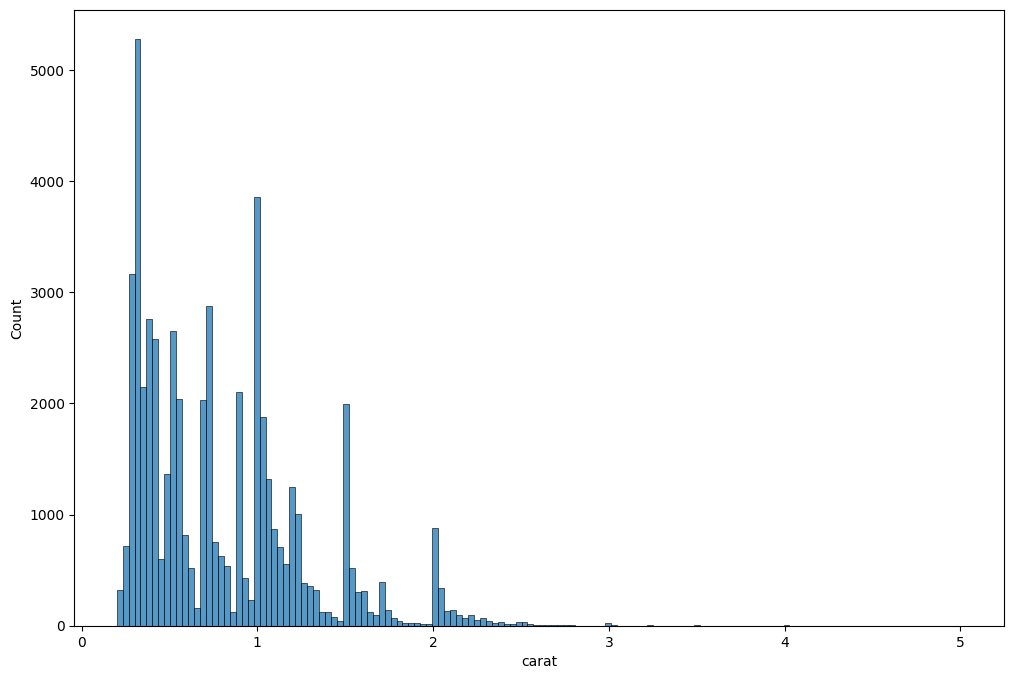

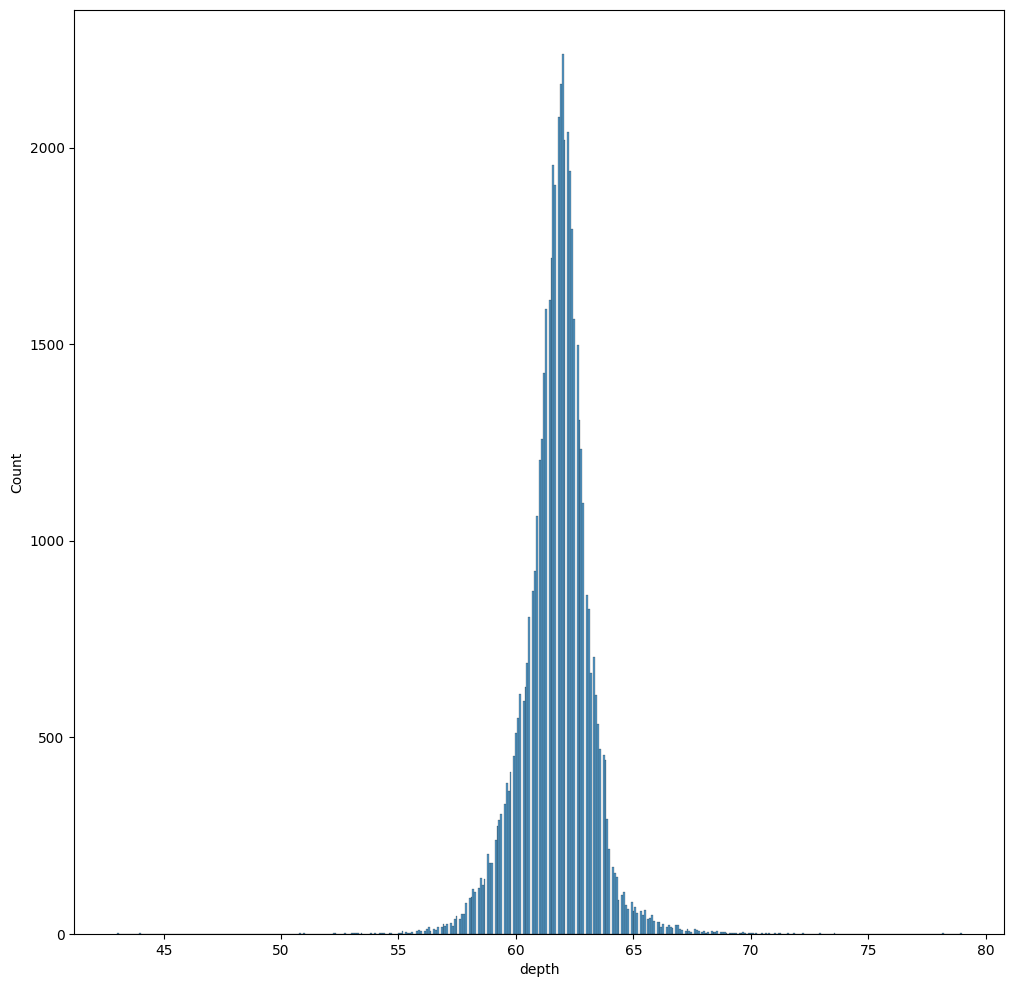

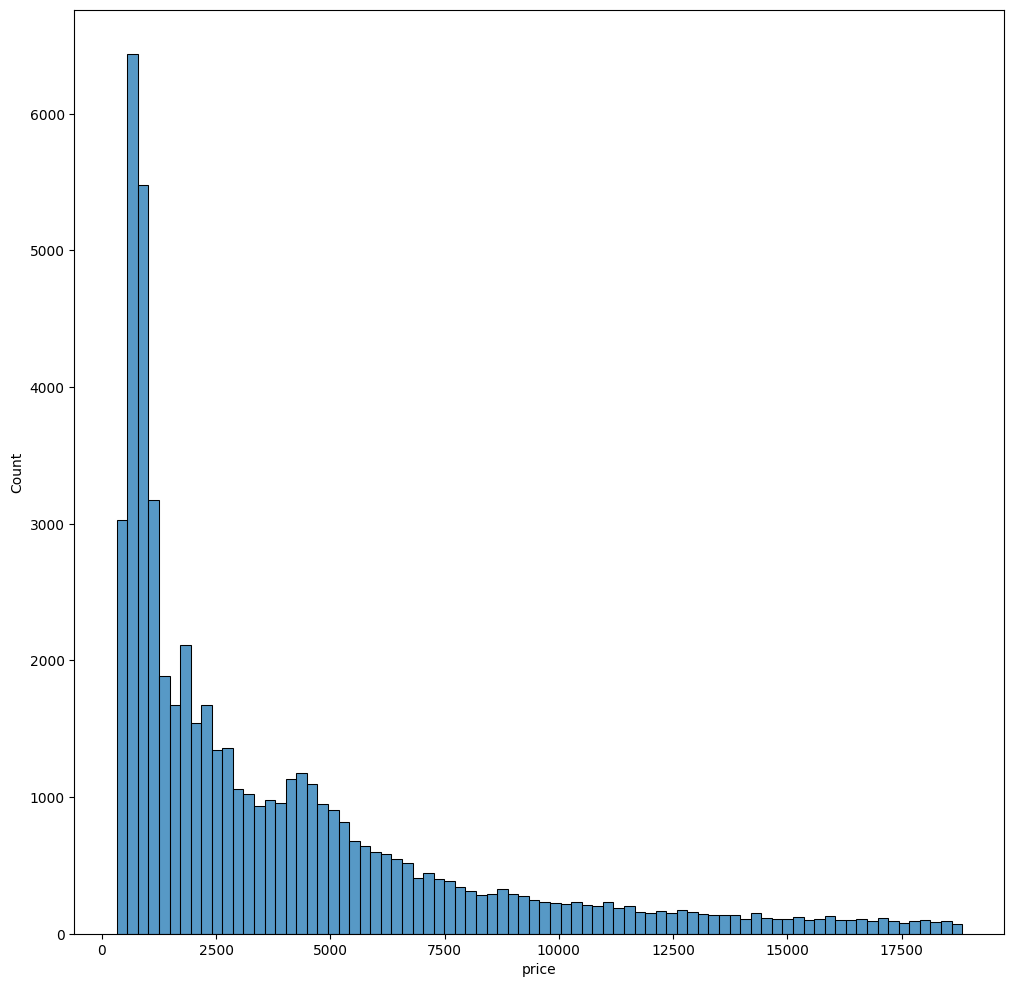

In [107]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='carat')
plt.show()
plt.figure(figsize=(12,12))
sns.histplot(data=df,x='depth')
plt.show()
plt.figure(figsize=(12,12))
sns.histplot(data=df,x='price')
plt.show()

In [108]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [109]:
tdf=pd.get_dummies(df['cut'])
df=pd.concat([df,tdf],axis=1)
df.drop(columns='cut',axis=1,inplace=True)

In [110]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
le=LabelEncoder()
df['color']=le.fit_transform(df['color'])

In [113]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [114]:
tdf=pd.get_dummies(df['clarity'],prefix='clarity')
df=pd.concat([df,tdf],axis=1)
df.drop(columns=['clarity','Unnamed: 0'],axis=1,inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   color         53940 non-null  int32  
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   x             53940 non-null  float64
 6   y             53940 non-null  float64
 7   z             53940 non-null  float64
 8   Fair          53940 non-null  bool   
 9   Good          53940 non-null  bool   
 10  Ideal         53940 non-null  bool   
 11  Premium       53940 non-null  bool   
 12  Very Good     53940 non-null  bool   
 13  clarity_I1    53940 non-null  bool   
 14  clarity_IF    53940 non-null  bool   
 15  clarity_SI1   53940 non-null  bool   
 16  clarity_SI2   53940 non-null  bool   
 17  clarity_VS1   53940 non-null  bool   
 18  clarity_VS2   53940 non-nu

In [116]:
df=df.rename(columns={'x':'Length','y':'Width','z':'Depth'})

In [117]:
df.head()

,carat,color,depth,table,price,Length,Width,Depth,Fair,Good,Ideal,Premium,Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,False,False,True,False,False,False,False,False,True,False,False,False,False
1,0.21,1,59.8,61.0,326,3.89,3.84,2.31,False,False,False,True,False,False,False,True,False,False,False,False,False
2,0.23,1,56.9,65.0,327,4.05,4.07,2.31,False,True,False,False,False,False,False,False,False,True,False,False,False
3,0.29,5,62.4,58.0,334,4.20,4.23,2.63,False,False,False,True,False,False,False,False,False,False,True,False,False
4,0.31,6,63.3,58.0,335,4.34,4.35,2.75,False,True,False,False,False,False,False,False,True,False,False,False,False


In [118]:
for col in df.columns[df.dtypes=='bool']:
    df[col]=df[col].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   color         53940 non-null  int32  
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   Length        53940 non-null  float64
 6   Width         53940 non-null  float64
 7   Depth         53940 non-null  float64
 8   Fair          53940 non-null  int32  
 9   Good          53940 non-null  int32  
 10  Ideal         53940 non-null  int32  
 11  Premium       53940 non-null  int32  
 12  Very Good     53940 non-null  int32  
 13  clarity_I1    53940 non-null  int32  
 14  clarity_IF    53940 non-null  int32  
 15  clarity_SI1   53940 non-null  int32  
 16  clarity_SI2   53940 non-null  int32  
 17  clarity_VS1   53940 non-null  int32  
 18  clarity_VS2   53940 non-nu

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

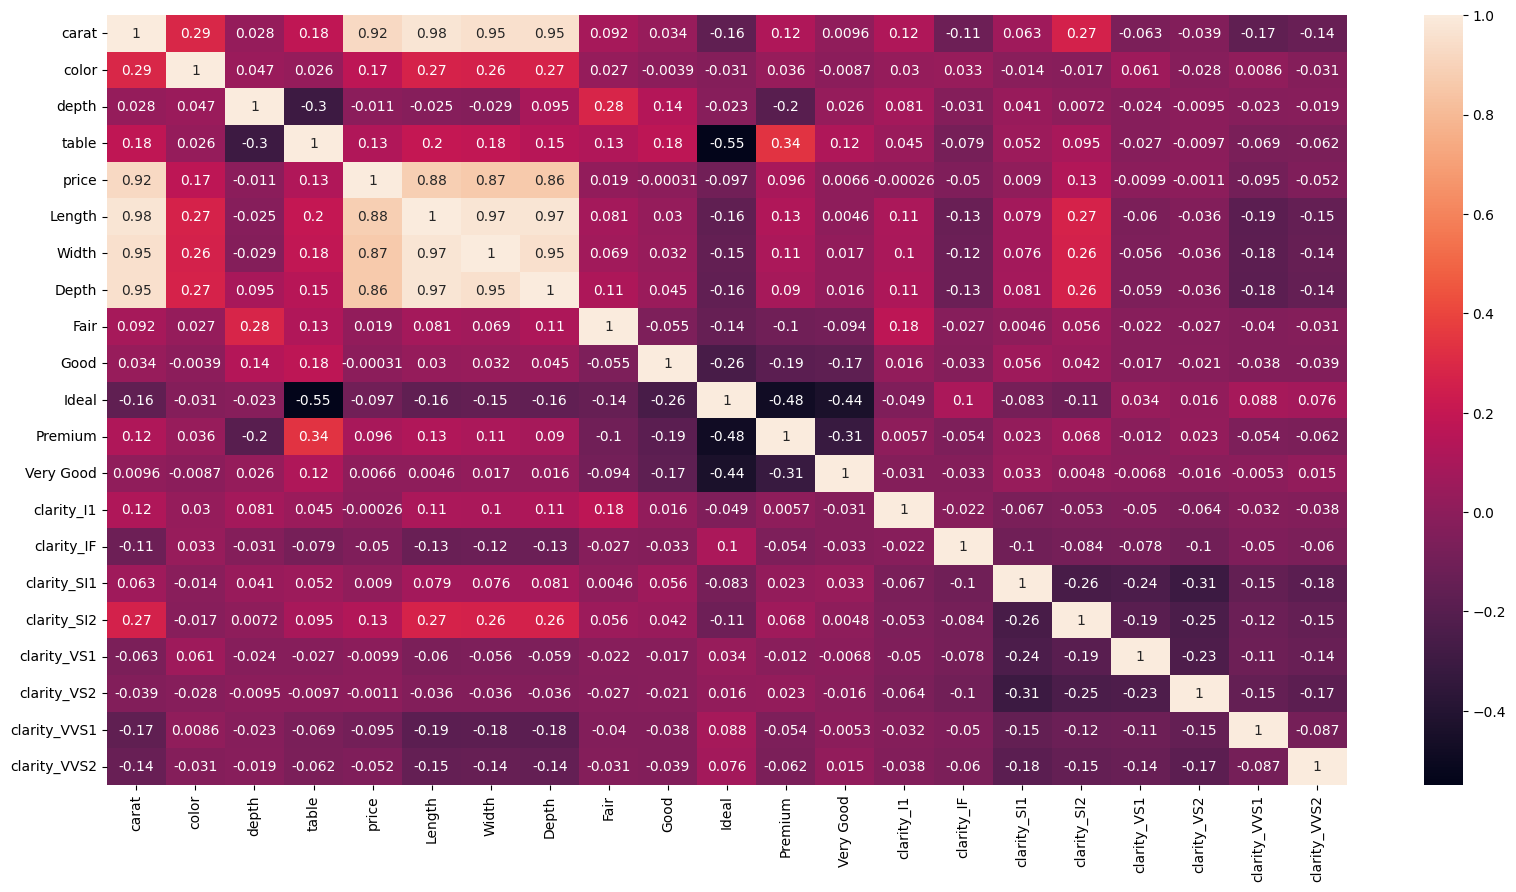

In [120]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Models

In [121]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

Linear Regression

In [122]:
ss=StandardScaler()
x=df.drop(columns='price')
y=df['price']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)
r_xt=ss.fit_transform(x_t)
r_xte=ss.transform(x_te)
r_yt=y_t.copy()
r_yte=y_te.copy()

In [123]:
reg=LinearRegression()
reg.fit(r_xt,r_yt)
pred1=reg.predict(r_xte)
print(r2_score(r_yte,pred1))
print(mean_squared_error(r_yte,pred1))

0.9174645946420884
1294954.88444556


Decision Tree Regressor

In [124]:
dt_xt=x_t.copy()
dt_xte=x_te.copy()
dt_yt=y_t.copy()
dt_yte=y_te.copy()
dt=DecisionTreeRegressor()
path=dt.cost_complexity_pruning_path(dt_xt,dt_yt)
alphas=path.ccp_alphas
param={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=param,n_jobs=-1,random_state=20,scoring='r2')
ndt.fit(dt_xt,dt_yt)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 16.331153133115578}
0.9655689410167738


In [125]:
dt=DecisionTreeRegressor(ccp_alpha=ba)
param={'criterion':['squared_error','poisson'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(1,101)),
       'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=param,cv=10,n_jobs=-1,random_state=20,scoring='r2')
ndt.fit(dt_xt,dt_yt)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 21, 'min_samples_leaf': 26, 'max_features': None, 'criterion': 'squared_error'}
0.9722158568776113


In [126]:
pred2=ndt.predict(dt_xte)
print(r2_score(dt_yte,pred2))
print(mean_squared_error(dt_yte,pred2))

0.9738912718787696
409637.83797552483


Random Forest Regressor

In [127]:
rf_xt=x_t.copy()
rf_xte=x_te.copy()
rf_yt=y_t.copy()
rf_yte=y_te.copy()
rf=RandomForestRegressor()
param={'criterion':['squared_error','poisson'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(1,101)),
       'max_features':['sqrt','log2',None],'n_estimators':[300],'max_depth':list(np.arange(1,101))}
nrf=RandomizedSearchCV(rf,param_distributions=param,cv=10,n_jobs=-1,random_state=20,scoring='r2')
nrf.fit(rf_xt,rf_yt)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 300, 'min_samples_split': 44, 'min_samples_leaf': 20, 'max_features': None, 'max_depth': 35, 'criterion': 'squared_error'}
0.9741346795244417


In [128]:
pred3=nrf.predict(rf_xte)
print(r2_score(rf_yte,pred3))
print(mean_squared_error(rf_yte,pred3))

0.9772795378500069
356476.99687675614


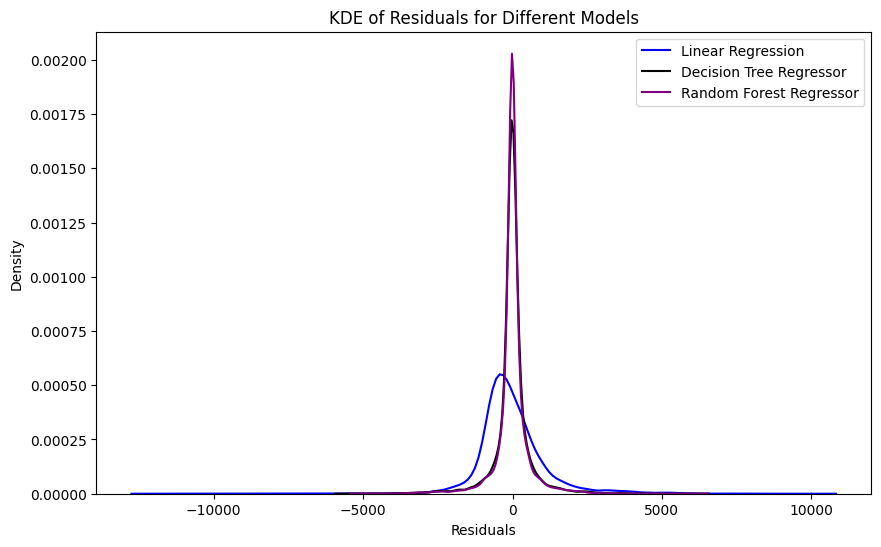

In [130]:
plt.figure(figsize=(10, 6))
sns.kdeplot(r_yte - pred1, label='Linear Regression', color='blue')
sns.kdeplot(dt_yte - pred2, label='Decision Tree Regressor', color='black')
sns.kdeplot(rf_yte - pred3, label='Random Forest Regressor', color='purple')
plt.legend()
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('KDE of Residuals for Different Models')
plt.show()